In [1]:
# Imports
import plyvel
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
M01_PATH = '../hydra-data/ipns-export-M01'
M02_PATH = '../hydra-data/ipns-export-M02'
M03_PATH = '../hydra-data/ipns-export-M03'

measurements = []
for path in [M01_PATH, M02_PATH, M03_PATH]:
    db = plyvel.DB(path)
    try:
        names = {}
        for k, v in db:
            key = k.decode('utf-8')
            # only take versioned entry
            match = re.search('/[0-9]+$', key)
            if match:
                record = json.loads(v)
                record['version'] = int(match.group(0)[1:])
                if not names.get(record['Name']):
                    names[record['Name']] = []
                names[record['Name']].append(record)
        for name in names.keys():
            names[name].sort(key=lambda n: n['version'])
        measurements.append(names)
    finally:
        db.close()

max update times:  43


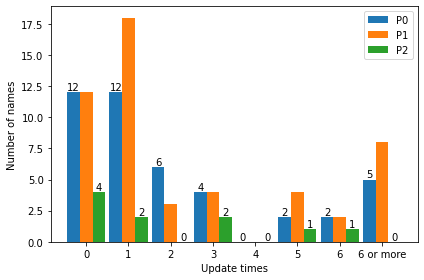

In [15]:
# Update times
max_times = 0
for m in measurements:
    for k in m.keys():
        num_updates = len(m[k]) - 1
        if num_updates > max_times:
            max_times = num_updates

print('max update times: ', max_times)

labels = [*range(7), '6 or more']
updates_for_measurements = []

for m in measurements:
    updates = []
    for _ in range(8):
        updates.append(0)

    for k in m.keys():
        num_updates = len(m[k]) - 1
        if num_updates < len(labels):
            updates[num_updates] += 1
        else:
            updates[-1] += 1
    
    updates_for_measurements.append(updates)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, updates_for_measurements[0], width, label='P0')
rects2 = ax.bar(x, updates_for_measurements[1], width, label='P1')
rects2 = ax.bar(x + width, updates_for_measurements[2], width, label='P2')

ax.set_ylabel('Number of names')
ax.set_xlabel('Update times')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)

fig.tight_layout()

plt.show()